# Exploratory Data Analysis (EDA)

This notebook contains my optimized workflow for exploring the Telangana RTO vehicle registration dataset. I focus on efficient data loading, cleaning, visualization, and analysis using pandas, numpy, matplotlib, and seaborn.

**SQL Table Columns:**
| Column Name | Data Type |
|------------------|------------|
| slno | bigint |
| registrationNo | varchar |
| regvalidfrom | date |
| regvalidto | date |
| makerName | nvarchar |
| modelDesc | nvarchar |
| bodyType | nvarchar |
| cc | real |
| cylinder | smallint |
| fuel | nvarchar |
| hp | real |
| seatCapacity | smallint |
| OfficeCd | nvarchar |


## 1. Import Optimized Libraries

Import the main libraries for efficient data analysis and visualization.


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted', color_codes=True)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14

## 2. Load Dataset Efficiently

Load the cleaned dataset using optimized pandas parameters for speed and memory usage.


In [61]:
# Use SQL column names for loading
usecols = [
    'slno', 'registrationNo', 'regvalidfrom', 'regvalidto', 'makerName', 'modelDesc',
    'bodyType', 'cc', 'cylinder', 'fuel', 'hp', 'seatCapacity', 'OfficeCd'
]
dtype = {
    'slno': 'int64',
    'registrationNo': 'string',
    'regvalidfrom': 'string',
    'regvalidto': 'string',
    'makerName': 'string',
    'modelDesc': 'string',
    'bodyType': 'string',
    'cc': 'float32',
    'cylinder': 'int16',
    'fuel': 'string',
    'hp': 'float32',
    'seatCapacity': 'int16',
    'OfficeCd': 'string'
}
file_path = '../Dataset/Vehicle_Data_Cleaned.csv'
df = pd.read_csv(file_path, usecols=usecols, dtype=dtype, low_memory=False)
df.head()

,slno,registrationNo,regvalidfrom,regvalidto,makerName,modelDesc,bodyType,cc,cylinder,fuel,hp,seatCapacity,OfficeCd
0,98,AP09TA3408,2009-03-19,2025-11-28,Tata Motors Limited,Tata Ace Ht-2-Seater-Bs-Iii,Open,702.0,2,DIESEL,12.0,2,RTA RANGAREDDY
1,257,AP09TA3461,2009-03-28,2026-01-21,Maruti Udyog Ltd,Omni Mpi Cargo Bsiii,Saloon,796.0,3,PETROL,24.0,2,RTA MEDCHAL
2,350,AP09TA3987,2009-07-24,2026-02-27,Toyota Kirloskar Motor,Innova 2.5L G,Saloon,2494.0,4,DIESEL,0.0,8,RTA WANAPARTHY
3,1266,AP09TA4149,2009-04-02,2026-01-16,Eicher Motors,10.90 G Rhd E Cab & H.S.Deck,TANKER,3298.0,4,DIESEL,70.0,3,RTA RANGAREDDY
4,1268,TS35F8340,2009-04-15,2029-08-27,Escorts Limited,Tata Sumo Victa Di Cx 7 Seater,Saloon,2956.0,4,DIESEL,52.0,7,RTA IBRAHIMPATNAM


## 3. Preview Data and Data Types

Quickly inspect the data structure, types, and basic statistics.


In [62]:
print('DataFrame Info:')
df.info()

print('\nSummary Statistics:')
df.describe(include='all').T

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517812 entries, 0 to 517811
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   slno            517812 non-null  int64  
 1   registrationNo  517812 non-null  string 
 2   regvalidfrom    517812 non-null  string 
 3   regvalidto      484408 non-null  string 
 4   makerName       517812 non-null  string 
 5   modelDesc       517812 non-null  string 
 6   bodyType        517754 non-null  string 
 7   cc              517812 non-null  float32
 8   cylinder        517812 non-null  int16  
 9   fuel            509975 non-null  string 
 10  hp              517812 non-null  float32
 11  seatCapacity    517812 non-null  int16  
 12  OfficeCd        517812 non-null  string 
dtypes: float32(2), int16(2), int64(1), string(8)
memory usage: 41.5 MB

Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
slno,517812.0,NaN,NaN,NaN,11224994.026315,4354275.781017,98.0,8502611.75,14241635.5,14444498.25,14578594.0
registrationNo,517812,517812,TS35F8340,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
regvalidfrom,517812,7916,2025-04-19,4958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
regvalidto,484408,5159,2040-04-18,4386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
makerName,517812,967,Honda Motorcycle&Scooter(I)P L,95617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modelDesc,517812,14882,Activa-Dlx Bsvi-Ph2,9961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bodyType,517754,44,Solo,283879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,517812.0,NaN,NaN,NaN,834.373535,1193.30957,0.0,113.0,160.0,1199.0,37801.0
cylinder,517812.0,NaN,NaN,NaN,3.782929,72.721715,0.0,1.0,1.0,4.0,2979.0
fuel,509975,13,PETROL,341073,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Handle Missing Values

Identify and handle missing values efficiently using pandas.


In [63]:
missing = df.isnull().sum()
print('Missing values per column:')
print(missing[missing > 0])

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object' or df[col].dtype == 'string':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

Missing values per column:
regvalidto    33404
bodyType         58
fuel           7837
dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_20568\936067250.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## 5. Optimized Descriptive Statistics

Generate summary statistics for key features, focusing on performance for large datasets.


In [64]:
import os
import pathlib
notebook_dir = pathlib.Path().resolve().parent
reports_dir = os.path.join(notebook_dir, 'Reports')
images_dir = os.path.join(reports_dir, 'images')
os.makedirs(reports_dir, exist_ok=True)
os.makedirs(images_dir, exist_ok=True)

# Top 10 Makers and Market Share
maker_counts = df['makerName'].value_counts()
maker_share = maker_counts / maker_counts.sum() * 100
top_makers = maker_counts.head(10)
top_share = maker_share.head(10)
top_makers.to_csv(os.path.join(reports_dir, 'Top_10_Makers.csv'))
top_share.to_csv(os.path.join(reports_dir, 'Top_10_Makers_Market_Share.csv'))
plt.figure()
sns.barplot(x=top_makers.values, y=top_makers.index, palette='viridis')
plt.title('Top 10 Makers by Count')
plt.xlabel('Number of Vehicles')
plt.ylabel('Maker')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Top_10_Makers_Bar.png'))
plt.close()
plt.figure()
sns.barplot(x=top_share.values, y=top_share.index, palette='mako')
plt.title('Top 10 Makers Market Share (%)')
plt.xlabel('Market Share (%)')
plt.ylabel('Maker')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Top_10_Makers_Market_Share_Bar.png'))
plt.close()

# Top 10 Models and Market Share
model_counts = df['modelDesc'].value_counts()
model_share = model_counts / model_counts.sum() * 100
top_models = model_counts.head(10)
top_model_share = model_share.head(10)
top_models.to_csv(os.path.join(reports_dir, 'Top_10_Models.csv'))
top_model_share.to_csv(os.path.join(reports_dir, 'Top_10_Models_Market_Share.csv'))
plt.figure()
sns.barplot(x=top_models.values, y=top_models.index, palette='crest')
plt.title('Top 10 Models by Count')
plt.xlabel('Number of Vehicles')
plt.ylabel('Model')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Top_10_Models_Bar.png'))
plt.close()
plt.figure()
sns.barplot(x=top_model_share.values, y=top_model_share.index, palette='rocket')
plt.title('Top 10 Models Market Share (%)')
plt.xlabel('Market Share (%)')
plt.ylabel('Model')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Top_10_Models_Market_Share_Bar.png'))
plt.close()

# Registrations by Office (sorted and improved scaling)
office_counts = df['OfficeCd'].value_counts().sort_values(ascending=True)
office_counts.to_csv(os.path.join(reports_dir, 'Registrations_by_Office.csv'))
plt.figure(figsize=(10, 16))
sns.barplot(x=office_counts.values, y=office_counts.index, palette='flare')
plt.title('Registrations by Office (Sorted)')
plt.xlabel('Number of Registrations')
plt.ylabel('Office Code')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Registrations_by_Office_Bar_Scaled.png'))
plt.close()

C:\Users\asus\AppData\Local\Temp\ipykernel_20568\3293804952.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makers.values, y=top_makers.index, palette='viridis')
C:\Users\asus\AppData\Local\Temp\ipykernel_20568\3293804952.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_share.values, y=top_share.index, palette='mako')
C:\Users\asus\AppData\Local\Temp\ipykernel_20568\3293804952.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette='crest')
C:\Users\asus\AppData\Local\Temp\ip

## 6. Visualize Distributions Efficiently

Create optimized visualizations for key features using matplotlib and seaborn.


Max date: 2025-04-30 00:00:00
Min date: 1942-06-18 00:00:00
Most common dates:
regvalidfrom
2025-04-19    4958
2025-01-04    4688
2025-04-16    4675
2025-04-07    4596
2025-01-06    4556
2025-01-09    4377
2025-03-10    4333
2025-01-08    4331
2025-01-03    4245
2025-04-17    4090
Name: count, dtype: int64


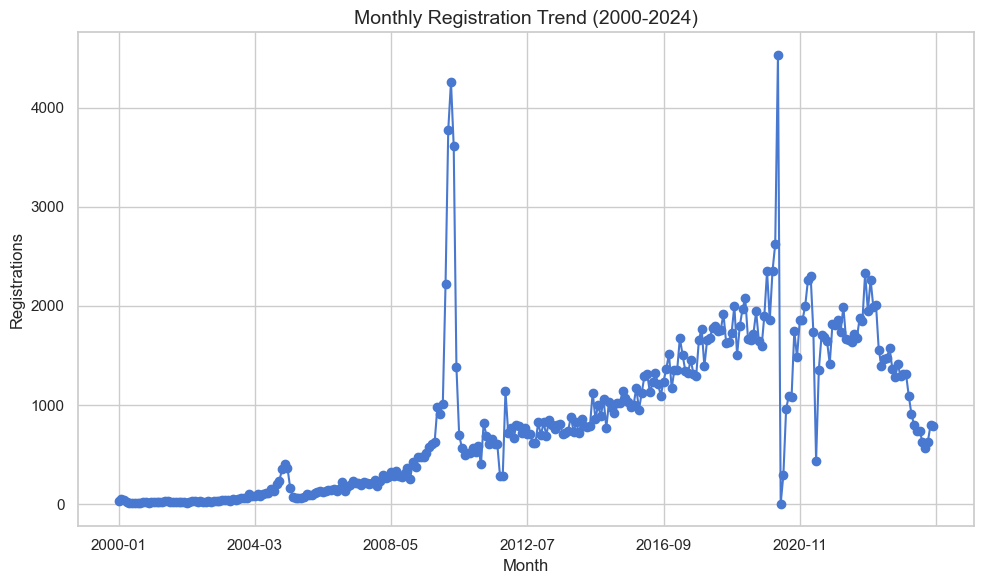

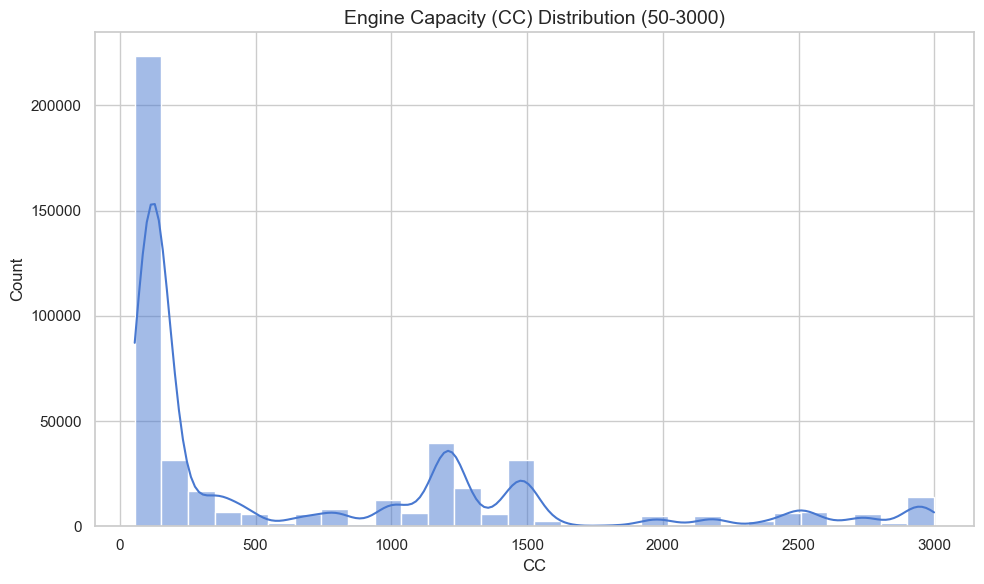

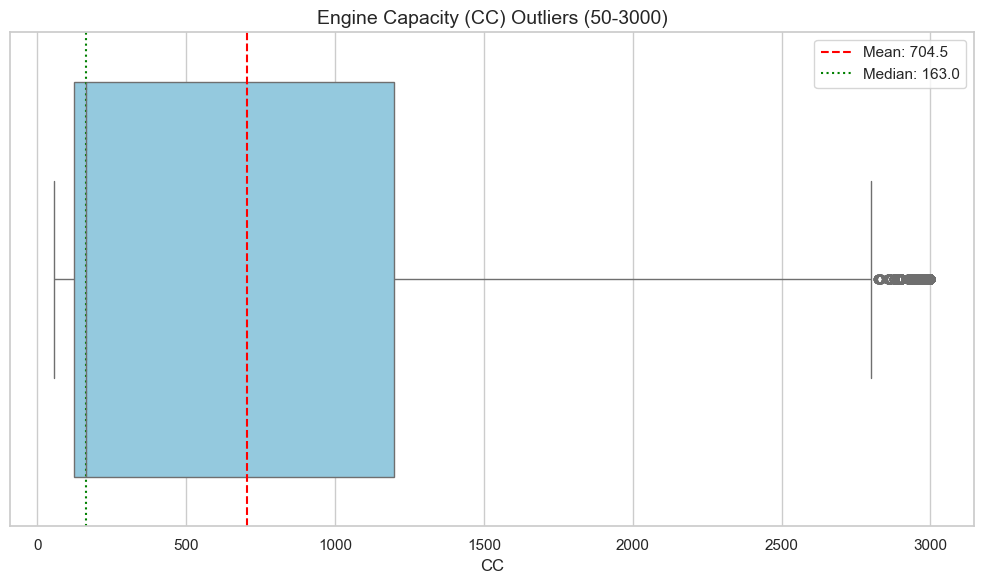

Number of outliers: 15224
Mean CC: 704.54, Median CC: 163.00


In [65]:
if 'regvalidfrom' in df.columns:
    df['regvalidfrom'] = pd.to_datetime(df['regvalidfrom'], errors='coerce')
    # Check for future or suspicious dates
    print('Max date:', df['regvalidfrom'].max())
    print('Min date:', df['regvalidfrom'].min())
    print('Most common dates:')
    print(df['regvalidfrom'].value_counts().head(10))
    recent = df[(df['regvalidfrom'] > pd.Timestamp('2000-01-01')) & (df['regvalidfrom'] < pd.Timestamp('2025-01-01'))]
    monthly_recent = recent.groupby(recent['regvalidfrom'].dt.to_period('M')).size()
    monthly_recent.index = monthly_recent.index.astype(str)
    ax = monthly_recent.plot(kind='line', marker='o')
    plt.title('Monthly Registration Trend (2000-2024)')
    plt.xlabel('Month')
    plt.ylabel('Registrations')
    plt.tight_layout()
    import os, pathlib
    notebook_dir = pathlib.Path().resolve().parent
    reports_dir = os.path.join(notebook_dir, 'Reports')
    images_dir = os.path.join(reports_dir, 'images')
    os.makedirs(reports_dir, exist_ok=True)
    os.makedirs(images_dir, exist_ok=True)
    plt.savefig(os.path.join(images_dir, 'Monthly_Registration_Trend.png'))
    plt.show()


if 'cc' in df.columns:
    cc_zoom = df[(df['cc'] > 50) & (df['cc'] < 3000)]
    ax1 = sns.histplot(cc_zoom['cc'], bins=30, kde=True)
    plt.title('Engine Capacity (CC) Distribution (50-3000)')
    plt.xlabel('CC')
    plt.tight_layout()
    import os, pathlib
    notebook_dir = pathlib.Path().resolve().parent
    reports_dir = os.path.join(notebook_dir, 'Reports')
    images_dir = os.path.join(reports_dir, 'images')
    os.makedirs(reports_dir, exist_ok=True)
    os.makedirs(images_dir, exist_ok=True)
    plt.savefig(os.path.join(images_dir, 'Engine_Capacity_Distribution.png'))
    plt.show()

    # Calculate summary statistics
    mean_cc = cc_zoom['cc'].mean()
    median_cc = cc_zoom['cc'].median()
    q1 = cc_zoom['cc'].quantile(0.25)
    q3 = cc_zoom['cc'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = cc_zoom[(cc_zoom['cc'] < lower_bound) | (cc_zoom['cc'] > upper_bound)]

    ax2 = sns.boxplot(x=cc_zoom['cc'], color='skyblue')
    plt.title('Engine Capacity (CC) Outliers (50-3000)')
    plt.xlabel('CC')
    # Annotate mean and median
    plt.axvline(mean_cc, color='red', linestyle='--', label=f'Mean: {mean_cc:.1f}')
    plt.axvline(median_cc, color='green', linestyle=':', label=f'Median: {median_cc:.1f}')
    plt.legend()
    plt.tight_layout()
    import os, pathlib
    notebook_dir = pathlib.Path().resolve().parent
    reports_dir = os.path.join(notebook_dir, 'Reports')
    images_dir = os.path.join(reports_dir, 'images')
    os.makedirs(reports_dir, exist_ok=True)
    os.makedirs(images_dir, exist_ok=True)
    plt.savefig(os.path.join(images_dir, 'Engine_Capacity_Outliers.png'))
    plt.show()
    print(f"Number of outliers: {len(outliers)}")
    print(f"Mean CC: {mean_cc:.2f}, Median CC: {median_cc:.2f}")

## 7. Correlation Analysis

Compute and visualize the correlation matrix to understand feature relationships.


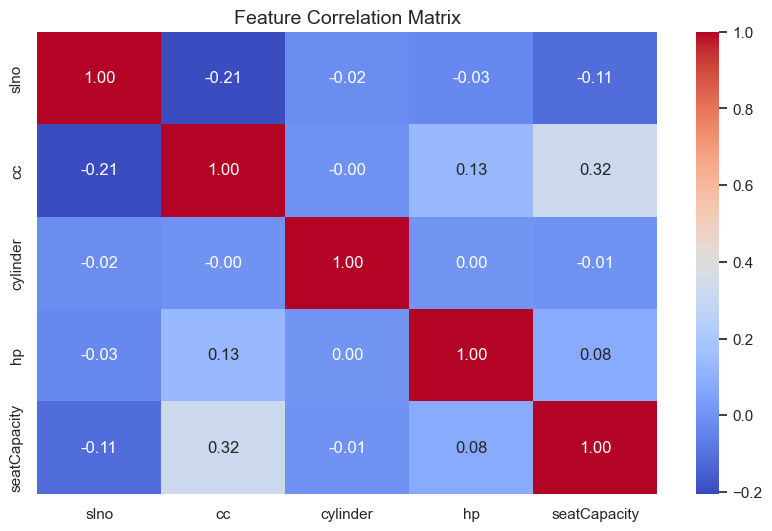

In [66]:
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## 8. Feature Engineering Suggestions

Suggest and demonstrate basic feature engineering steps for further analysis.


In [67]:
# Encode categorical variables
for col in ['makerName', 'modelDesc', 'bodyType', 'fuel', 'OfficeCd']:
    if col in df.columns and (df[col].dtype == 'object' or df[col].dtype == 'string'):
        df[col] = df[col].astype('category').cat.codes

# Create new features
if 'regvalidfrom' in df.columns:
    df['Year'] = pd.to_datetime(df['regvalidfrom'], errors='coerce').dt.year
    df['Month'] = pd.to_datetime(df['regvalidfrom'], errors='coerce').dt.month

df.head()

,slno,registrationNo,regvalidfrom,regvalidto,makerName,modelDesc,bodyType,cc,cylinder,fuel,hp,seatCapacity,OfficeCd,Year,Month
0,98,AP09TA3408,2009-03-19,2025-11-28,908,11877,23,702.0,2,4,12.0,2,25,2009,3
1,257,AP09TA3461,2009-03-28,2026-01-21,680,9899,28,796.0,3,8,24.0,2,16,2009,3
2,350,AP09TA3987,2009-07-24,2026-02-27,923,6142,28,2494.0,4,4,0.0,8,31,2009,7
3,1266,AP09TA4149,2009-04-02,2026-01-16,94,66,35,3298.0,4,4,70.0,3,25,2009,4
4,1268,TS35F8340,2009-04-15,2029-08-27,102,12663,28,2956.0,4,4,52.0,7,3,2009,4
